### Import necessary libraries

In [4]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
data = pd.read_csv('sentimentdataset.csv')
# Ensure the Timestamp column is in datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%d-%m-%Y %H:%M')

### 1. Sentiment Analysis

In [9]:
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

data['Sentiment_Score'] = data['Text'].apply(analyze_sentiment)

# Classify sentiment into categories
def classify_sentiment(score):
    if score > 0.5:
        return 'Excitement'
    elif score > 0:
        return 'Contentment'
    elif score == 0:
        return 'Neutral'
    elif score > -0.5:
        return 'Displeasure'
    else:
        return 'Disappointment'

data['Sentiment_Category'] = data['Sentiment_Score'].apply(classify_sentiment)

In [12]:
print(data.head(5))

   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2     Just finished an amazing workout!                Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

            Timestamp            User     Platform  \
0 2023-01-15 12:30:00   User123          Twitter     
1 2023-01-15 08:45:00   CommuterX        Twitter     
2 2023-01-15 15:45:00   FitnessFan      Instagram    
3 2023-01-15 18:20:00   AdventureX       Facebook    
4 2023-01-15 19:55:00   ChefCook        Instagram    

                                     Hashtags  Retweets  Likes       Coun

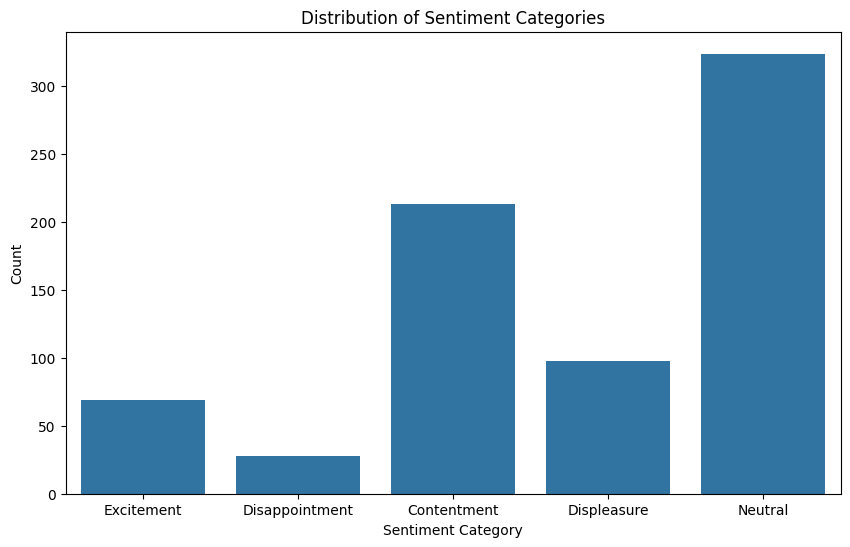

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment_Category', data=data)
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

### 2. Temporal Analysis

In [15]:
data['Year'] = data['Timestamp'].dt.year
data['Month'] = data['Timestamp'].dt.month
data['Day'] = data['Timestamp'].dt.day
data['Hour'] = data['Timestamp'].dt.hour

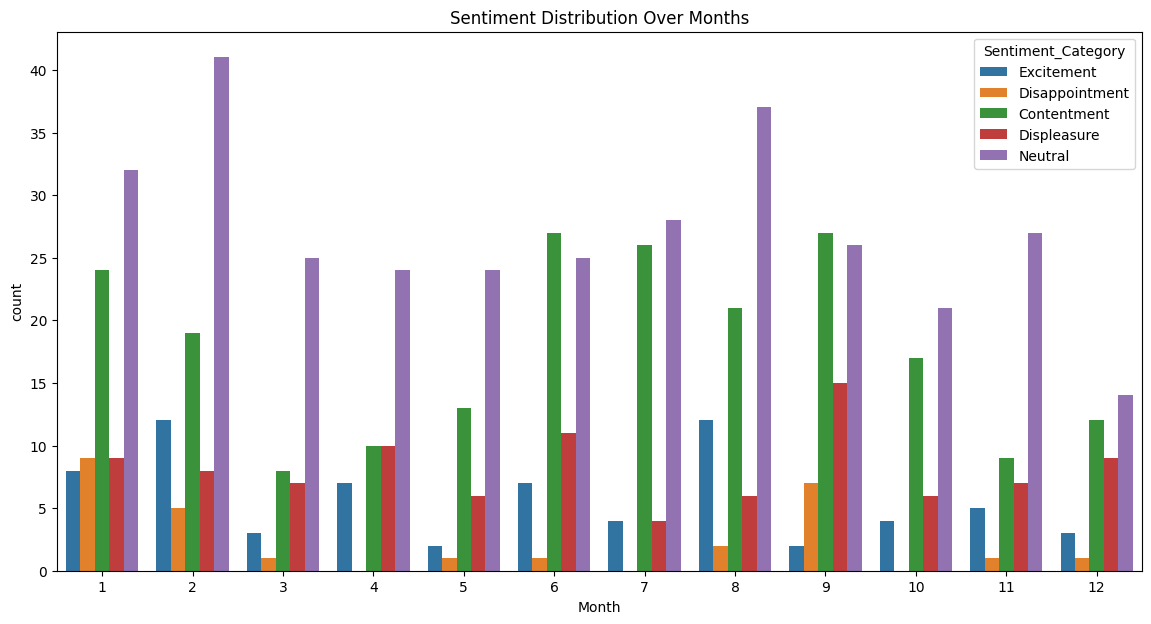

In [16]:
plt.figure(figsize=(14, 7))
sns.countplot(x='Month', hue='Sentiment_Category', data=data)
plt.title('Sentiment Distribution Over Months')
plt.show()

### 3. User Behavior Insights

In [17]:
user_engagement = data.groupby('User').agg({'Likes': 'sum', 'Retweets': 'sum'}).reset_index()

# Top 10 users by engagement
top_users = user_engagement.sort_values(by=['Likes', 'Retweets'], ascending=False).head(10)
print(top_users)

                   User  Likes  Retweets
670    WinterWarmth        170        85
124    CosmosExplorer      160        80
79     CarnivalDreamer     144        72
134   CulinaryExplorer     140        70
395    MusicHarmonist      140        70
441      PeakConqueror     138        69
180     EchoedLaughter     130        65
481       RainNurturer     126        63
268    GrowthSeeker        120        60
144    DanceEnthusiast     110        56


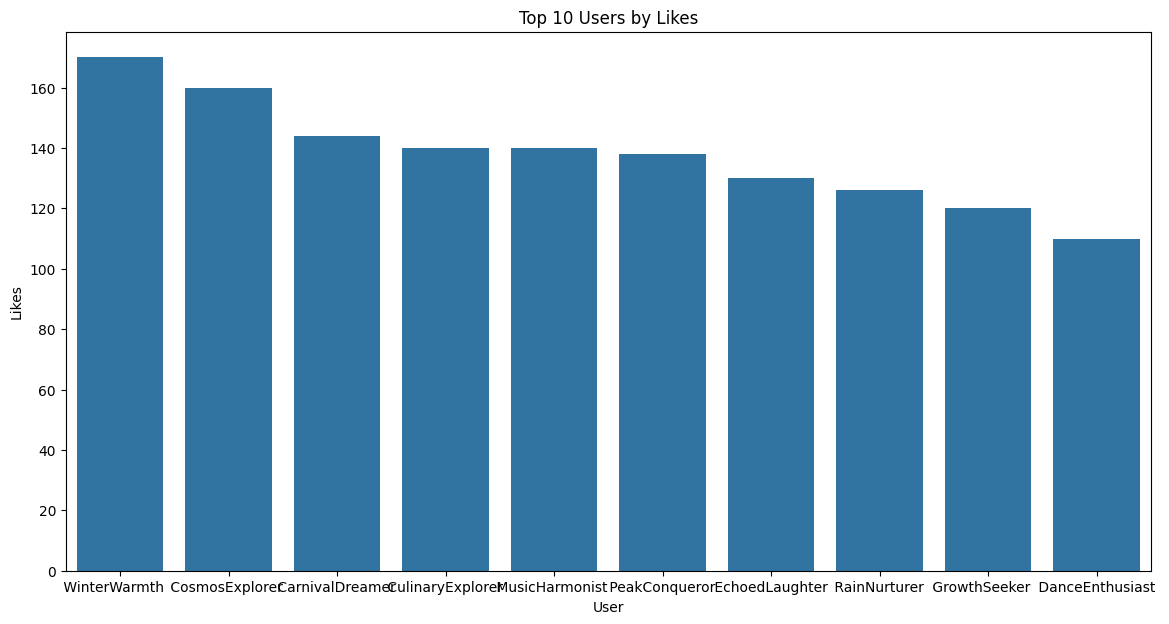

In [18]:
plt.figure(figsize=(14, 7))
sns.barplot(x='User', y='Likes', data=top_users)
plt.title('Top 10 Users by Likes')
plt.show()

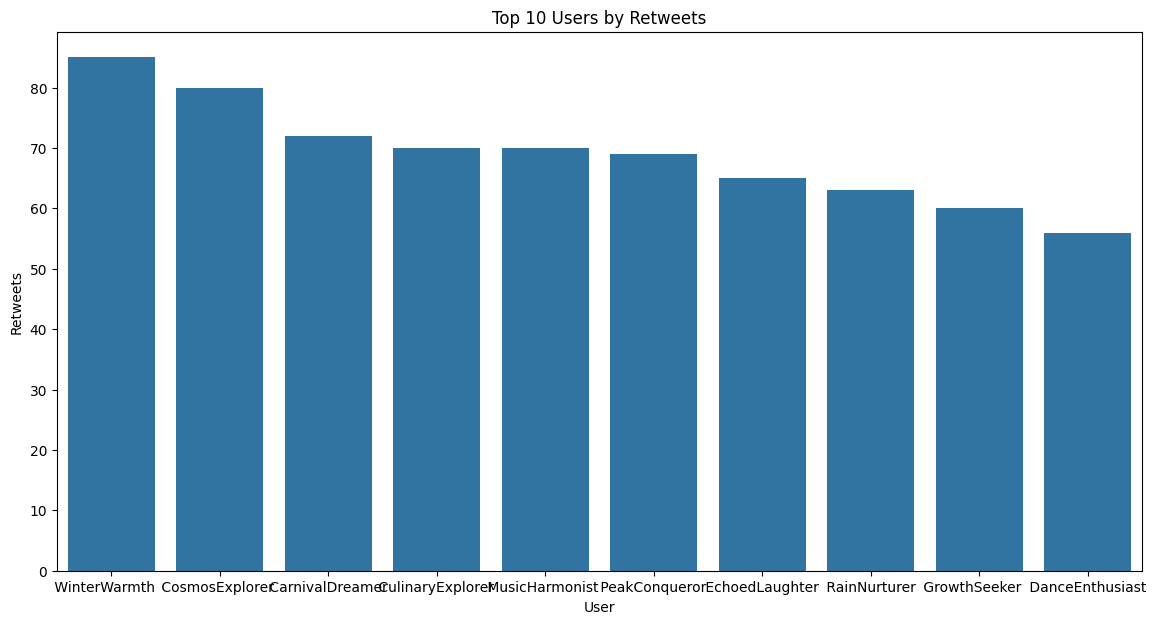

In [19]:
plt.figure(figsize=(14, 7))
sns.barplot(x='User', y='Retweets', data=top_users)
plt.title('Top 10 Users by Retweets')
plt.show()

### 4. Platform-Specific Analysis

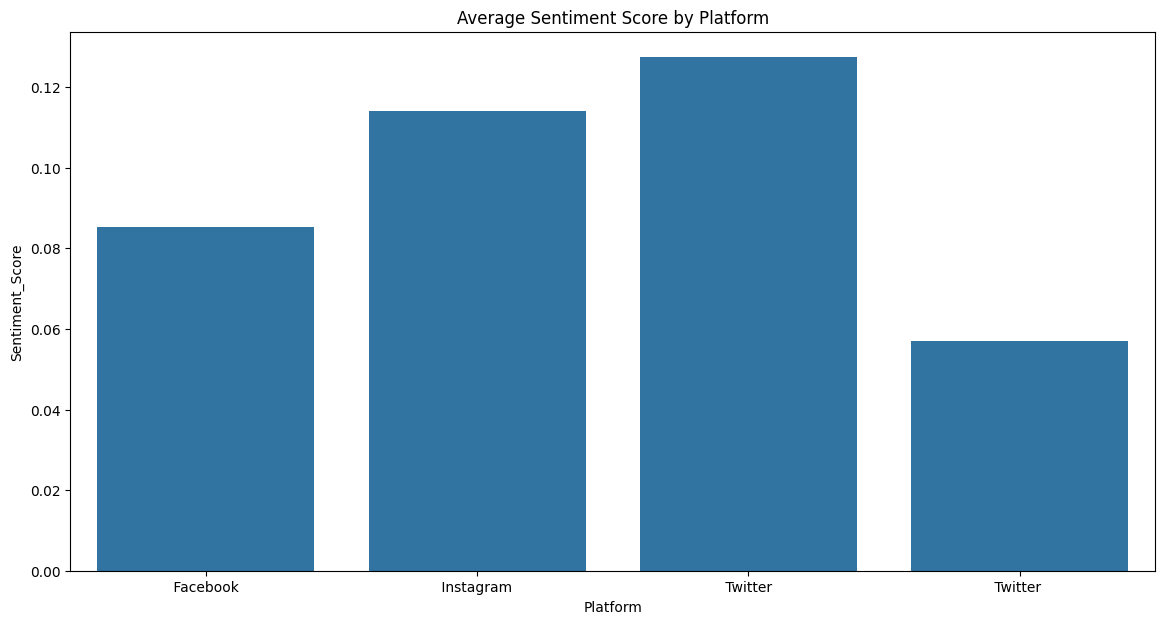

In [23]:
platform_sentiment = data.groupby('Platform')['Sentiment_Score'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(x='Platform', y='Sentiment_Score', data=platform_sentiment)
plt.title('Average Sentiment Score by Platform')
plt.show()

### 5. Hashtag Trends

In [24]:
# Exploding hashtags into separate rows for analysis
hashtags = data['Hashtags'].str.split(' ', expand=True).stack().reset_index(level=1, drop=True)
hashtags.name = 'Hashtag'
data_hashtags = data.drop('Hashtags', axis=1).join(hashtags)

In [25]:
# Top 10 trending hashtags
top_hashtags = data_hashtags['Hashtag'].value_counts().head(10)
print(top_hashtags)

Hashtag
                7539
#Serenity         15
#Gratitude        13
#Excitement       13
#Despair          11
#Nostalgia        11
#Contentment      10
#Curiosity        10
#Awe               9
#Loneliness        9
Name: count, dtype: int64


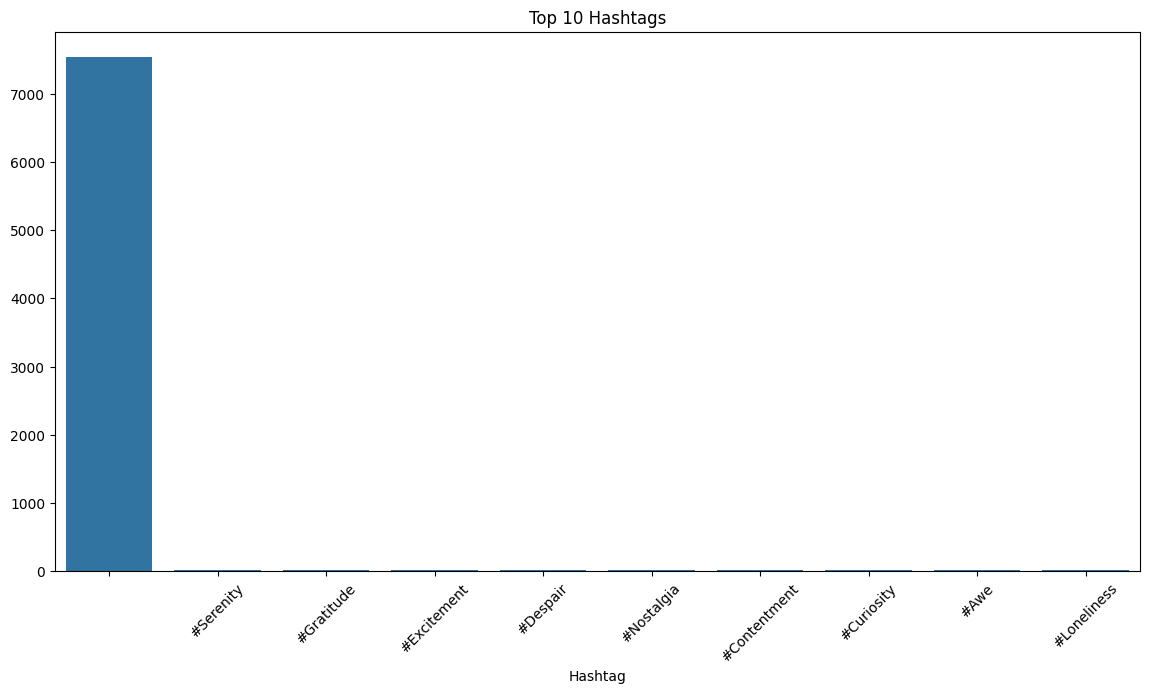

In [26]:
plt.figure(figsize=(14, 7))
sns.barplot(x=top_hashtags.index, y=top_hashtags.values)
plt.title('Top 10 Hashtags')
plt.xticks(rotation=45)
plt.show()

### 6. Geographical Analysis

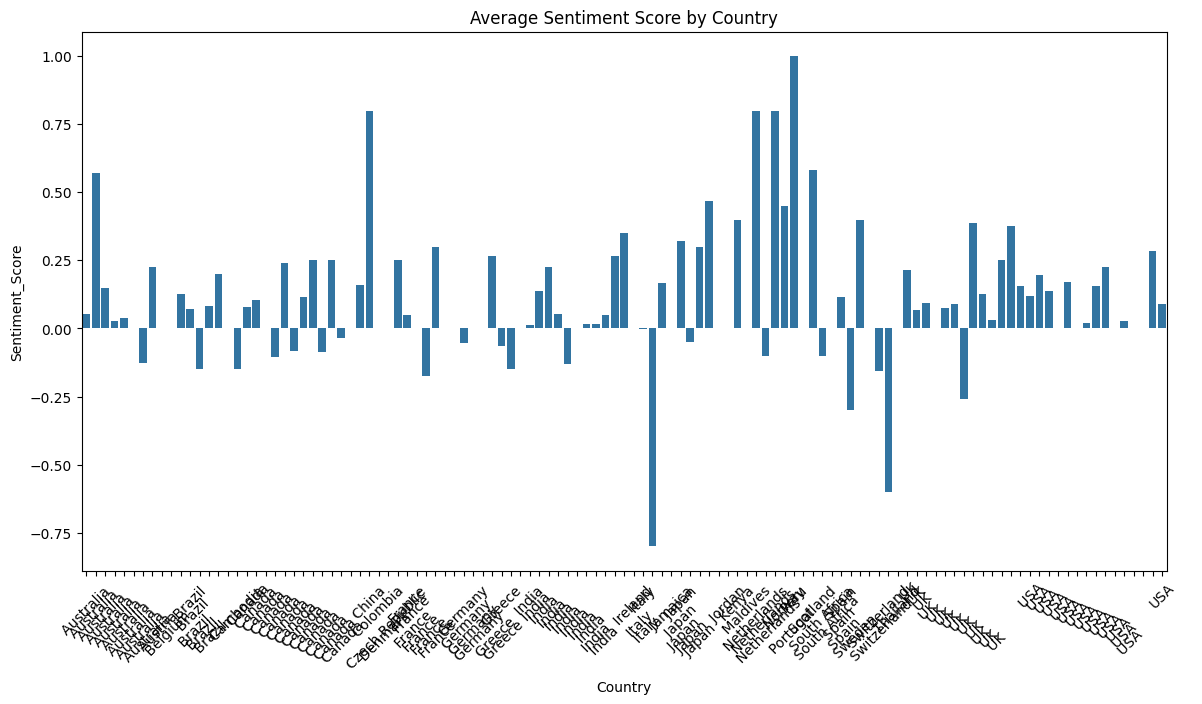

In [27]:
country_sentiment = data.groupby('Country')['Sentiment_Score'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(x='Country', y='Sentiment_Score', data=country_sentiment)
plt.title('Average Sentiment Score by Country')
plt.xticks(rotation=45)
plt.show()

In [29]:
data.to_csv('sentiment_analysis_results.csv', index=False)